In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme()

In [2]:
json_dir = 'intervals/'

data = []

for filename in os.listdir(json_dir):
    if filename.endswith('.json'):

        filepath = os.path.join(json_dir, filename)
        series = pd.read_json(filepath, orient='records', typ='series')

        data.append(series)

df = pd.DataFrame(data)
df['level'] = df['level'].round(2)


In [3]:
json_dir_qrf = 'qrf_intervals/'

data_qrf = []

for filename in os.listdir(json_dir_qrf):
    if filename.endswith('.json'):

        filepath = os.path.join(json_dir_qrf, filename)
        series = pd.read_json(filepath, orient='records', typ='series')

        data_qrf.append(series)

df_qrf = pd.DataFrame(data_qrf)
df_qrf['level'] = df_qrf['level'].round(2)

In [4]:
df_combined = pd.concat([df, df_qrf], axis=0)

In [5]:
df_level_neighs = df_combined.groupby(['level', 'n_neighbors'])[['width_mean']].agg([np.mean, np.std]).reset_index()

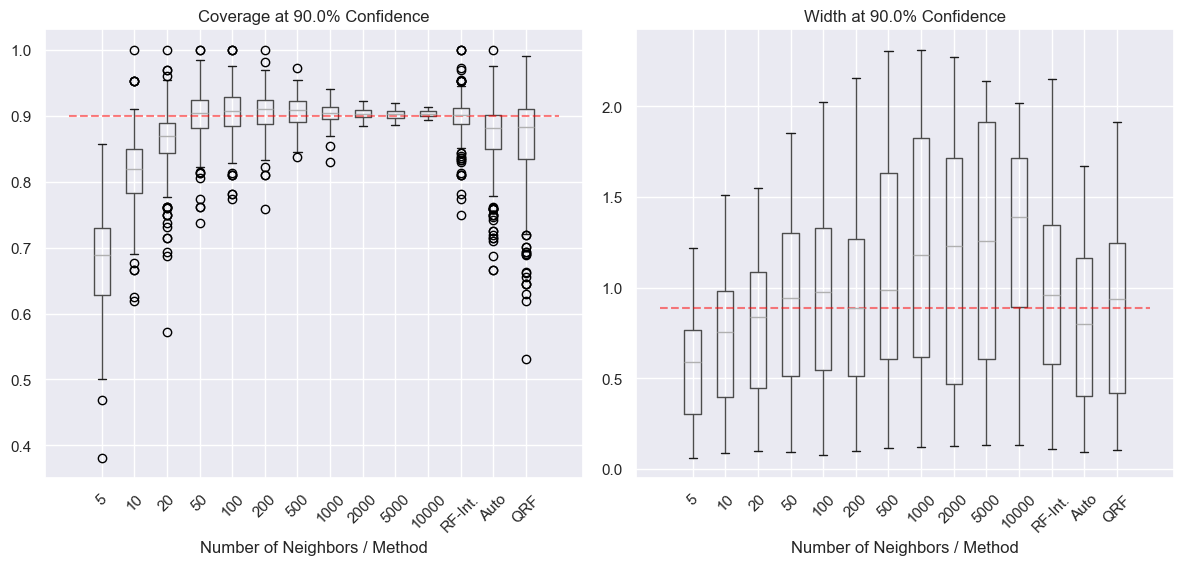

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
level = 0.90
df_level = df_combined[df_combined['level'] == level]

xtick_labels = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 'RF-Int.', 'Auto', 'QRF']

df_level.boxplot(column='coverage', by=['n_neighbors'], ax = ax[0])
ax[0].hlines(level, 0, 15, color = 'red', alpha = 0.5, linestyle = '--')
ax[0].set_title(f'Coverage at {level * 100}% Confidence')
ax[0].set_xticklabels(xtick_labels, rotation = 45)
ax[0].set_xlabel('Number of Neighbors / Method')

df_level.boxplot(column='width_mean', by=['n_neighbors'], ax = ax[1])
ax[1].hlines(df_level.width_mean.mean(), 0, 15, color = 'red', alpha = 0.5, linestyle = '--')
ax[1].set_title(f'Width at {level * 100}% Confidence')
ax[1].set_xticklabels(xtick_labels, rotation = 45)
ax[1].set_xlabel('Number of Neighbors / Method')

fig.suptitle('')
plt.tight_layout()
# plt.savefig('coverage_width.pdf')



<Axes: xlabel='data_name', ylabel='width_q1'>

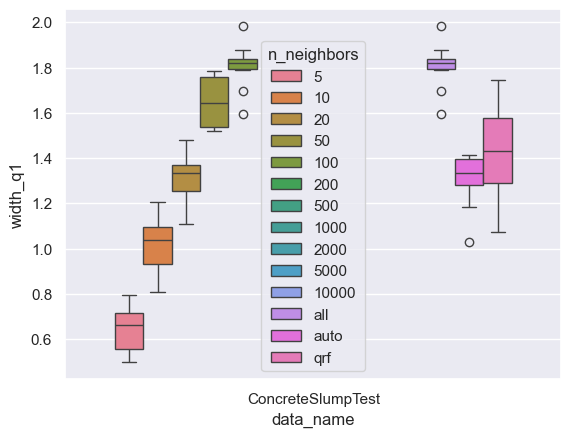

In [7]:
subset_df = df_combined[(df_combined['level'] == 0.95) & (df_combined['data_name'] == 'ConcreteSlumpTest')]
hue_order = [5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 'all', 'auto', 'qrf']


sns.boxplot(subset_df, x = 'data_name', y = 'width_q1', hue='n_neighbors',
            hue_order = hue_order)

C:\Users\rhodes8\AppData\Local\Temp\ipykernel_2232\3722849226.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_90.sort_values(by = 'coverage', inplace = True)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Automobile'),
  Text(1, 0, 'ConcreteSlumpTest'),
  Text(2, 0, 'Hydrodynamics'),
  Text(3, 0, 'EnergyEfficiency'),
  Text(4, 0, 'ComputerHardware'),
  Text(5, 0, 'AutoMPG'),
  Text(6, 0, 'IstanbulStock'),
  Text(7, 0, 'OpticalNetwork'),
  Text(8, 0, 'CyclePowerPlant'),
  Text(9, 0, 'ConcreteCompressiveStrength'),
  Text(10, 0, 'FacebookMetrics'),
  Text(11, 0, 'CommunityCrime'),
  Text(12, 0, 'FiveCitiesPM25'),
  Text(13, 0, 'Parkinsons'),
  Text(14, 0, 'AirfoilSelfNoise'),
  Text(15, 0, 'SML2010'),
  Text(16, 0, 'AirQuality'),
  Text(17, 0, 'BeijingPM25'),
  Text(18, 0, 'Naval Propulsion Plants'),
  Text(19, 0, 'Protein')])

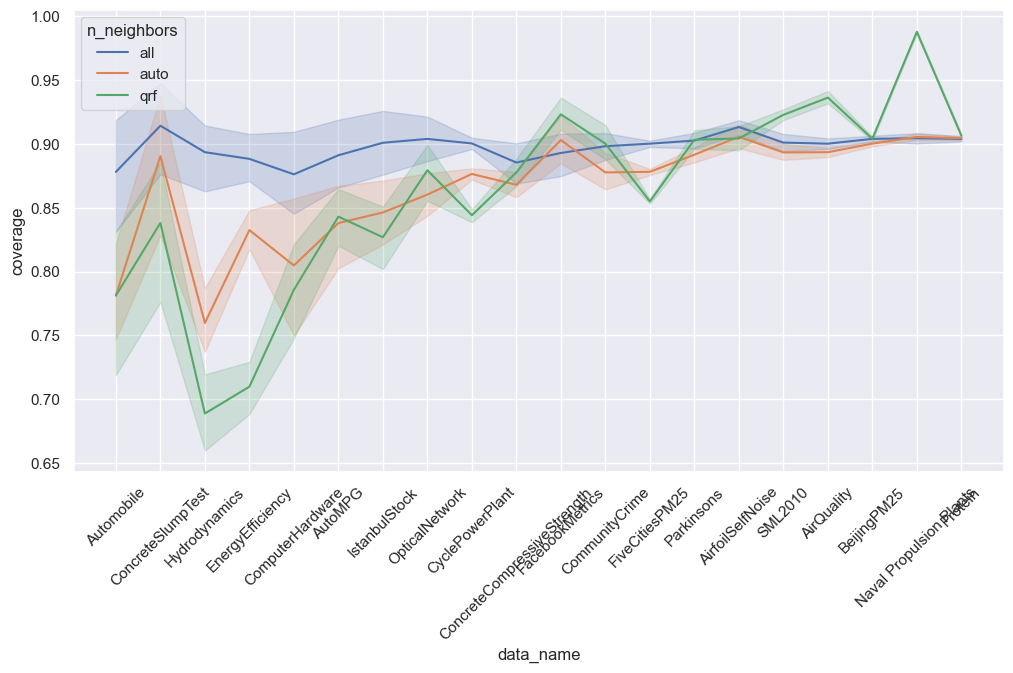

In [8]:

neighbors = ['all', 'auto', 'qrf']
fig, ax = plt.subplots(1, figsize = (12, 6))
df_90 = df_combined[(df_combined['level'] == 0.90) & (df_combined['n_neighbors'].isin(neighbors))]

df_90.sort_values(by = 'coverage', inplace = True)
sns.lineplot(df_90, x = 'data_name', y = 'coverage', hue = 'n_neighbors', hue_order = neighbors)

plt.xticks(rotation = 45)

C:\Users\rhodes8\AppData\Local\Temp\ipykernel_2232\1088405822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_90['log_width_mean'] = np.log(df_90['width_mean'])
C:\Users\rhodes8\AppData\Local\Temp\ipykernel_2232\1088405822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_90.sort_values(by = 'width_mean', inplace = True)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'FacebookMetrics'),
  Text(1, 0, 'Hydrodynamics'),
  Text(2, 0, 'Naval Propulsion Plants'),
  Text(3, 0, 'SML2010'),
  Text(4, 0, 'EnergyEfficiency'),
  Text(5, 0, 'OpticalNetwork'),
  Text(6, 0, 'ComputerHardware'),
  Text(7, 0, 'CyclePowerPlant'),
  Text(8, 0, 'AirfoilSelfNoise'),
  Text(9, 0, 'Automobile'),
  Text(10, 0, 'ConcreteCompressiveStrength'),
  Text(11, 0, 'AutoMPG'),
  Text(12, 0, 'AirQuality'),
  Text(13, 0, 'IstanbulStock'),
  Text(14, 0, 'BeijingPM25'),
  Text(15, 0, 'Parkinsons'),
  Text(16, 0, 'ConcreteSlumpTest'),
  Text(17, 0, 'FiveCitiesPM25'),
  Text(18, 0, 'CommunityCrime'),
  Text(19, 0, 'Protein')])

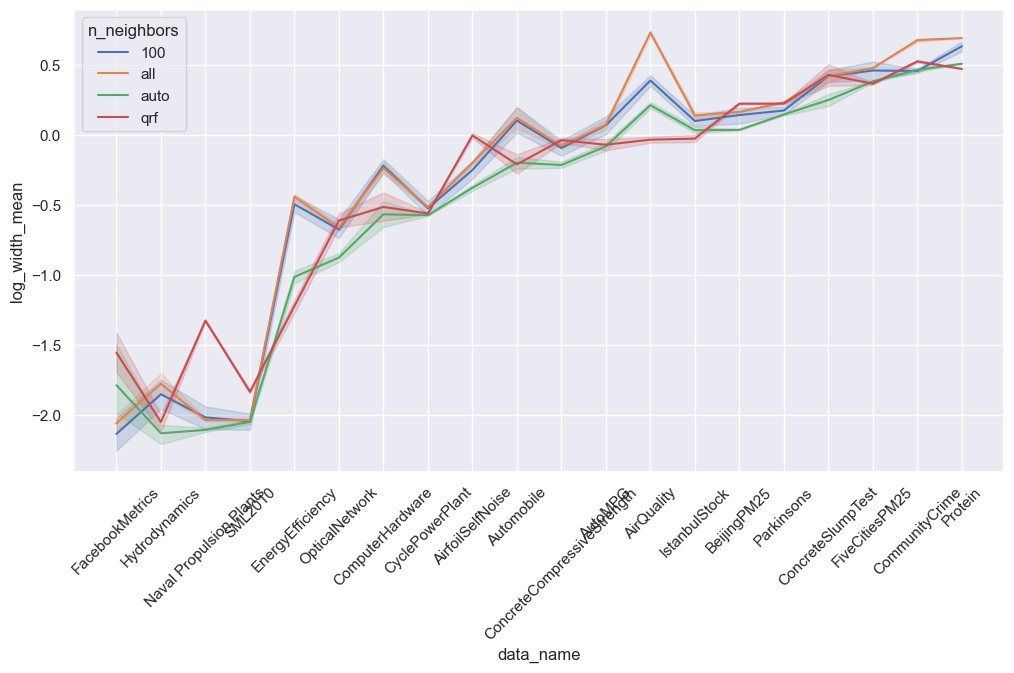

In [9]:
neighbors = [100, 'all', 'auto', 'qrf']
fig, ax = plt.subplots(1, figsize = (12, 6))
df_90 = df_combined[(df_combined['level'] == 0.90) & (df_combined['n_neighbors'].isin(neighbors))]

df_90['log_width_mean'] = np.log(df_90['width_mean'])

df_90.sort_values(by = 'width_mean', inplace = True)
sns.lineplot(df_90, x = 'data_name', y = 'log_width_mean', hue = 'n_neighbors', hue_order = neighbors)

plt.xticks(rotation = 45)

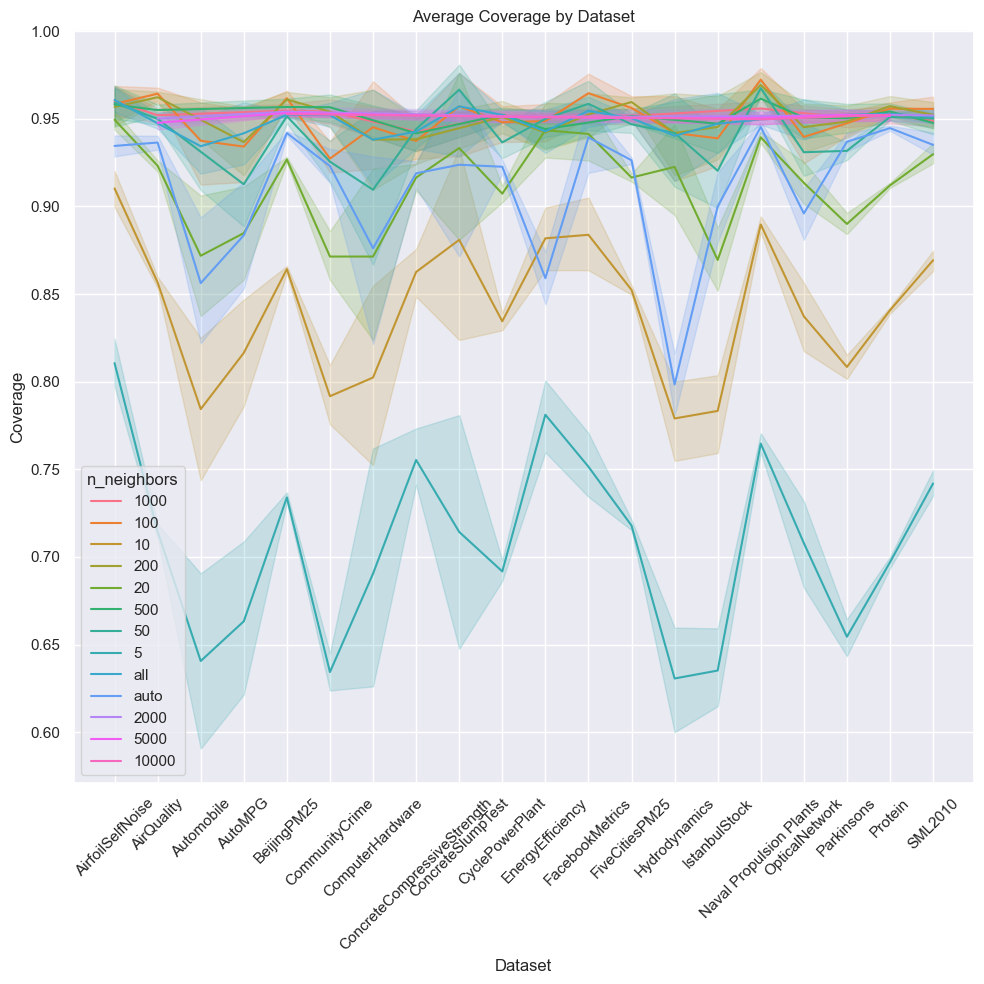

In [10]:
## Create line plot of average coverage by dataset
viz_df = df_combined[(df_combined.level == 0.95) & (
    (df_combined.n_neighbors == 'auto') | 
    (df_combined.n_neighbors == 'all') |
    (df_combined.n_neighbors != 'qrf')
)]

## Order plot by average coverage
#viz_df_sort = viz_df.groupby(['data_name', 'n_neighbors'])['coverage'].mean().reset_index()
#viz_df_sort = viz_df_sort.sort_values(by='coverage', ascending=False)

plt.figure(figsize=(10, 10))
sns.lineplot(x='data_name', y='coverage', hue='n_neighbors', data=viz_df) #, palette=ggplot_palette)
#sns.boxplot(x='data_name', y='coverage', hue='n_neighbors', data=viz_df) #, palette=ggplot_palette)

plt.title('Average Coverage by Dataset')
plt.ylabel('Coverage')
plt.xlabel('Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()